In [5]:
from transformers import AutoTokenizer
from datasets import load_dataset

import sys
sys.path.append("..")
from commands.configs import (
    BYTELEVEL_TOK_FOLDER,
    FINEWEBEDU_REPO_ID,
    HF_USERNAME,
    TOK_REPO_ID,
)

from torch import Tensor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
multilingual = False

from commands.configs import BYTE_LLM_PREDICTION_DATA, COMMONCORPUS_REPO_ID
byte_data = load_dataset(f"{HF_USERNAME}/{COMMONCORPUS_REPO_ID if multilingual else FINEWEBEDU_REPO_ID}", BYTE_LLM_PREDICTION_DATA)['fw57M' + ('multi' if multilingual else '')]
byte_level_tokenizer = AutoTokenizer.from_pretrained(f"{HF_USERNAME}/{TOK_REPO_ID}", subfolder=(BYTELEVEL_TOK_FOLDER + ('2' if multilingual else '')))

Resolving data files:   0%|          | 0/21 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/32 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/32 [00:00<?, ?it/s]

In [9]:
import pandas as pd
if multilingual:
    # Convert byte_data to pandas
    byte_data = pd.DataFrame(byte_data)
    byte_data = byte_data[byte_data['language'] == 'Russian']
    example = byte_data.iloc[0]
else:
    example = byte_data[13]
print(byte_level_tokenizer.decode(example['input_ids'][:]))

 A first-of-its-kind space rock filled with pristine material from the formation of the Earth itself has returned to the inner solar system, after billions of years in the cosmic boondocks. And it could help us piece together our planet’s origin story.
Four and a half billion years ago, chunks of the same material that formed Earth and the other rocky planets are thought to have been flung into the Oort cloud, a ring of icy debris encircling the outermost edge of the solar system. Untouched, they’ve been preserved for eons in the deep freeze of space. Now, astronomers have spotted one of these fossils nearby, marking the very first observation of a rocky object from the Oort cloud.
“This is super exciting, because it could be a piece of what formed the Earth” Olivier Hainaut—an astronomer at the European Southern Observatory and co-author on the new Science Advances study describing the discovery—told Gizmodo.
The object, dubbed PANSTARRS, was spotted in 2014 by Pan-STARRS1, a Hawaiian

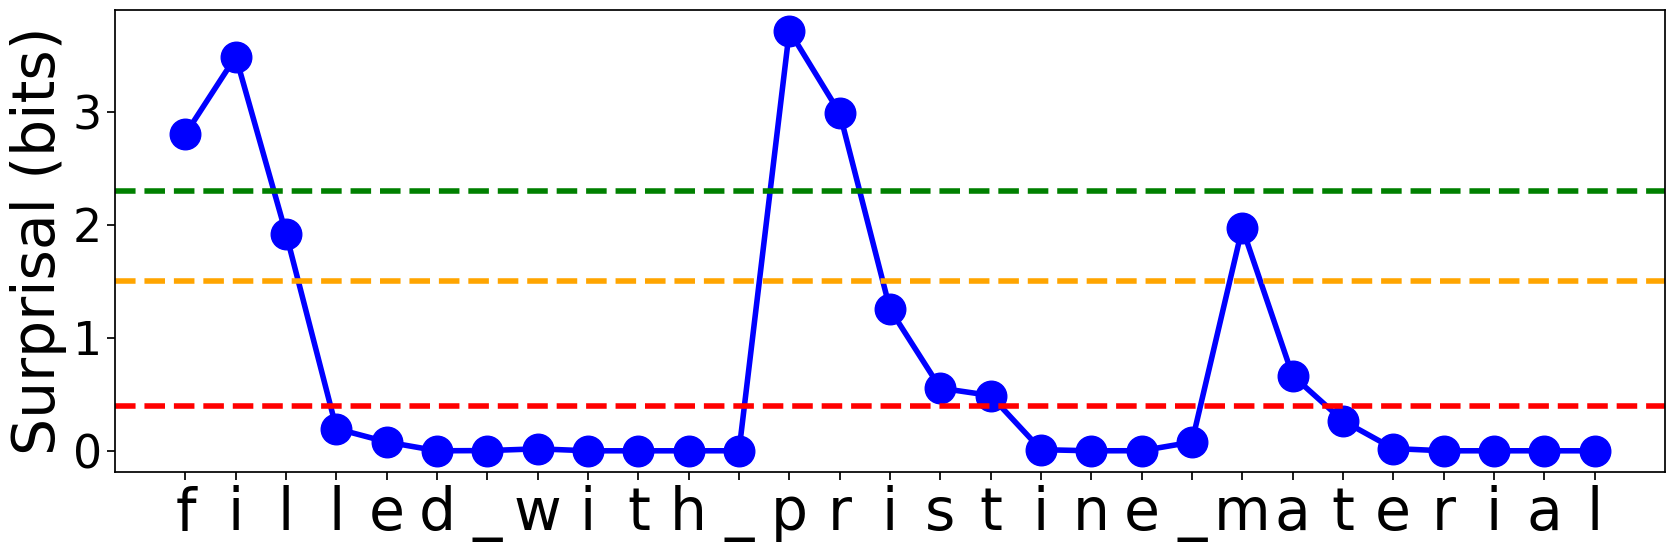

filled with pristine material
[46161, 2535, 2014, 4203, 7563, 834, 10826]
 fil##led with pr##isti##ne material


In [13]:
# example = byte_data[8]
# i = 813
# j = 855
# example = byte_data[11]
# i = 1508
# j = 1545
# example = byte_data[12]
# i = 2039
# j = 2065
example = byte_data[13]
i = 32
j = 61
# example = byte_data.iloc[0]
# i = 32
# j = 61
cue = 'Surprisal'

threshold = 0.4
threshold2 = 1.5
threshold3 = 2.3

signal = Tensor(example[cue][i:j])

# change font
plt.rcParams['font.serif'] = 'Lato'
plt.rcParams['font.size'] = 22

# font size
sns.set_context("notebook", font_scale=3)

plt.figure(figsize=(20, 6))
plt.plot(list(range(j-i)), signal, marker='o', linestyle='-', color='b', markersize=22, linewidth=4)
plt.ylabel(cue + ' (bits)', fontsize=42)
decoded = [byte_level_tokenizer.decode(inp) for inp in example['input_ids']]
decoded = ['_' if d == ' ' else d for d in decoded]
plt.xticks(list(range(j-i)), decoded[i:j], ha='center', fontsize=42)
plt.axhline(y=threshold, color='red', linestyle='--', linewidth=4)
plt.axhline(y=threshold2, color='orange', linestyle='--', linewidth=4)
plt.axhline(y=threshold3, color='green', linestyle='--', linewidth=4)
plt.show()

t = AutoTokenizer.from_pretrained(f"{HF_USERNAME}/{TOK_REPO_ID}", subfolder='fw57Mmulti_Surprisal_thresholdB_64000')
#t = AutoTokenizer.from_pretrained(f"{HF_USERNAME}/{TOK_REPO_ID}", subfolder='frequencymulti_64000')
text = byte_level_tokenizer.decode(example['input_ids'][i:j])

from tokenizers import decoders
#t._tokenizer.decoder = decoders.WordPiece(prefix='##')

print(text)
tokenized = t.encode(text)
print(tokenized)
untokenized = t.decode(tokenized)
print(untokenized)
ids = [byte_level_tokenizer.convert_tokens_to_ids(x) for x in untokenized]